# Tutorial de Processamento Digital de Imagens com Python 3 e OpenCV

Tutorial criado com base no livro **Introdução à Visão Computacional** de André Backes e Jarbas Sá Junior
### Requisitos:
- Python 3.7 ou mais recente
- OpenCV 4.0 ou mais recente
- Numpy 1.18 ou mais recente
- Matplotlib 3.3 ou mais recente

In [1]:
# Importanto bibliotecas necessárias
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

### Lendo e exibindo imagens
Usaremos o OpenCV para ler imagens e o Matplotlib para visualizá-las

In [2]:
path = os.path.join('files', 'nasa2.png') 
img = cv2.imread(path) # Abre o arquivo de imagem e salva na variável IMG

Uma imagem lida pelo OpenCV nada mais é que um *array* de *arrays* do Numpy, Ou seja, uma matriz. Isso nos dá algumas informações interessantes intrínsecas ao Numpy. Um exemplo é o *shape* que nos diz quantas linhas, colunas e canais tem uma imagem.

In [58]:
img.shape

(560, 1000, 3)

A imagem possui 560 de altura por 1000 de comprimento, em 3 canais. Agora vamos visualizá-la.

O OpenCV possui uma função para visualizar imagens é a ```cv2.imshow()```. Entretanto, esta cria uma nova janela, por fins didáticos usaremos o Pyplot do Matplotlib para visualizar as imagens no output da célula.

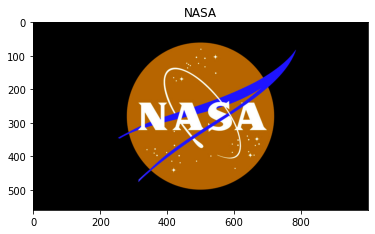

In [59]:
plt.imshow(img)
plt.title("NASA")
plt.show()

Algo de errado não está certo! O símbolo da NASA não possui essas cores! Isso ocorre, pois o OpenCV implementa seu padrão de imagens coloridas na ordem reversa. O costume que temos é de pensar sempre da seguinte forma:

Uma imagem colorida possui 3 canais, R representando a quantidade de vermelho, G para a quantidade de verde e B para a quantidade de azul. Entretanto o OpenCV utiliza o padrão **BGR**. Ou seja, a primeira e a terceira colunas estão invertidas. De qualquer forma, temos uma solução fácil para isso, vejamos abaixo:

In [3]:
# A função cvtColor converte uma imagem de uma padrão de cores para outro de acordo com a flag
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

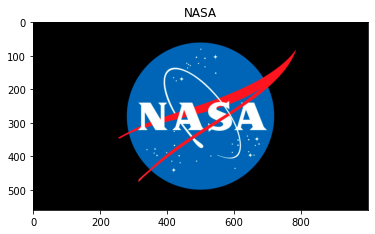

In [61]:
# Visualizando novamente
plt.imshow(img)
plt.title("NASA")
plt.show()

Problema resolvido!

Utilizando essa mesma função ```cv2.cvtColor()``` podemos transformar uma imagem em alguns outros padrões muito comuns, por exemplo a **escala de cinza** 

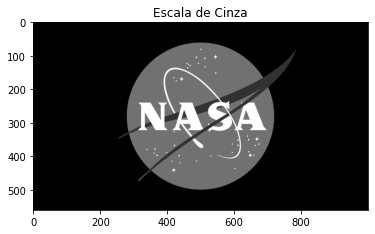

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Escala de Cinza")
plt.show()

Como podemos ver abaixo, a imagem que antes possuía 3 canais, agora tornou-se uma matriz 2D, com um único canal.

In [10]:
gray.shape

(560, 1000)

Utilizando essa imagem em escala de cinza, podemos criar imagens binárias, onde cada pixel só pode ser 0 ou 1

In [21]:
binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

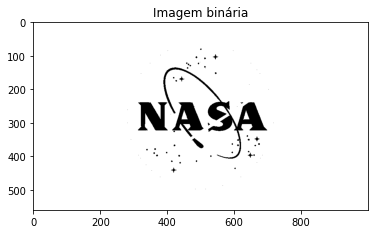

In [25]:
plt.imshow(binary, cmap="binary")
plt.title("Imagem binária")
plt.show()

Na imagem acima, todos os pontos maiores que 127 tornaram-se 1 e todos os menores 0. Podemos alterar este limiar de 127, por exemplo

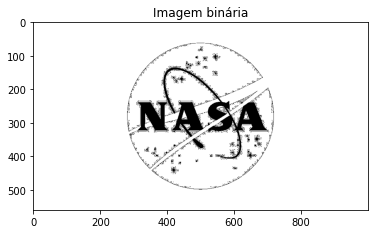

In [32]:
binary = cv2.threshold(gray, 115, 255, cv2.THRESH_BINARY)[1]
plt.imshow(binary, cmap="binary")
plt.title("Imagem binária")
plt.show()

Podemos acessar e manipular os pixels da imagem diretamente

In [62]:
(b,g,r) = img[200,500]
print("Canal azul:", b)
print("Canal verde:", g)
print("Canal vermelho:", r)

Canal azul: 0
Canal verde: 101
Canal vermelho: 183


Desenhando pontos vermelhos na imagem

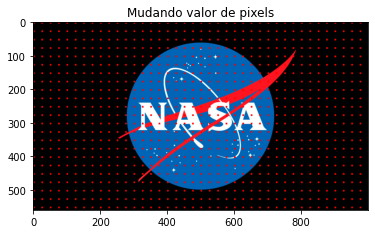

In [72]:
new_img = img.copy()
for y in range(0, img.shape[0], 25):
    for x in range(0, img.shape[1], 25):
        new_img[y:y+5, x: x+5] = (255,0,0)
        
plt.imshow(new_img)
plt.title("Mudando valor de pixels")
plt.show()

Também podemos alterar fatias inteiras da imagem utilizando o slicing de listas do python

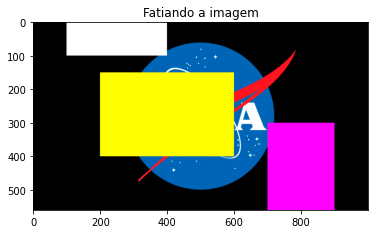

In [81]:
slice_img = img.copy()
slice_img[0:100,100:400] = (255, 255, 255) # Retângulo branco
slice_img[300:800,700:900] = (255, 0, 255) # Retângulo rosa
slice_img[150:400,200:600] = (255, 255, 0) # Retângulo amarelo

plt.imshow(slice_img)
plt.title("Fatiando a imagem")
plt.show()

## Transformações

Veremos agora alguns exemplos de transformações lineares e não lineares que podemos aplicar

### Recortando uma imagem / Crop

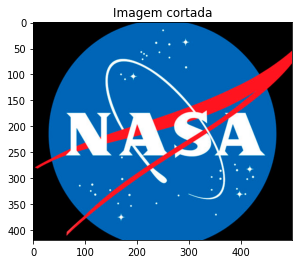

In [88]:
crop = img[65:485, 250:750]
plt.imshow(crop)
plt.title("Imagem cortada")
plt.show()

### Redimensionando uma imagem / Resize

In [102]:
print(img.shape)
new_shape = (560, 1000)
resized = cv2.resize(img, new_shape)
print(resized.shape)

(560, 1000, 3)
(1000, 560, 3)


Podemos ver que o shape da imagem foi invertido, vamos ver:

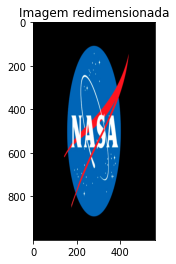

In [105]:
plt.imshow(resized)
plt.title("Imagem redimensionada")
plt.show()

Podemos utilizar essa função para redimensionar a imagem mantendo seu formato original também. Isso é muito utilizado em processos de machine learning para diminuir o tamanho da imagem sem perder informação

(280, 500, 3)

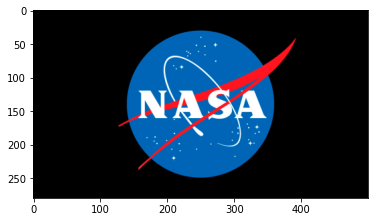

In [109]:
new_shape = (int(img.shape[1]*0.5), int(img.shape[0]*0.5))
resized = cv2.resize(img, new_shape)
plt.imshow(resized)
resized.shape


### Espelhamento de uma image / Flip

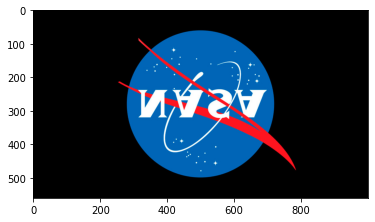

In [112]:
flipped_vert = cv2.flip(img, 0)
plt.imshow(flipped_vert)

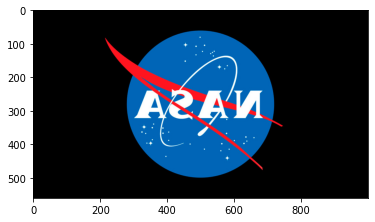

In [114]:
flipped_hori = cv2.flip(img, 1)
plt.imshow(flipped_hori)

### Rotacionando uma imagem
Para rotacionar uma imagem precisamos de uma matriz de rotação, o OpenCV possui uma função que já retorna essa matriz, basta passarmos o ponto correspondente ao centro da imagem

In [4]:
(height, width) = img.shape[:2]
center = (width // 2, height // 2) # Calculando o centro 

rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0) # 45 corresponde ao grau de rotação escolhido
                                                           # 1.0 é a escala da transformação
rotated = cv2.warpAffine(img, rotation_matrix, (width, height))

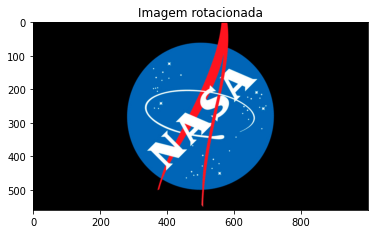

In [125]:
plt.imshow(rotated)
plt.title("Imagem rotacionada")
plt.show()

### Operações aritméticas

#### Diferença
A operação de diferença é muito útil para detectar por exemplo movimento, vejamos:

In [142]:
rotation_matrix = cv2.getRotationMatrix2D(center, 20, 1.0)
rotated = cv2.warpAffine(img, rotation_matrix, (width, height))

diff = rotated - img

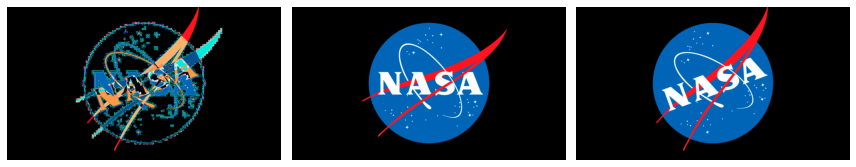

In [149]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))

ax1.imshow(diff)
ax1.axis("off")
ax2.imshow(img)
ax2.axis("off")
ax3.imshow(rotated)
ax3.axis("off")
plt.tight_layout()
plt.show()

Podemos ver na primeira imagem a diferença entre a imagem original (no meio) e a imagem rotacionada (na direita)

### Máscaras
Podemos usar operações lógicas e aritméticas para criar máscaras. Vamos criar uma máscara para transformar o fundo da imagem em branco 

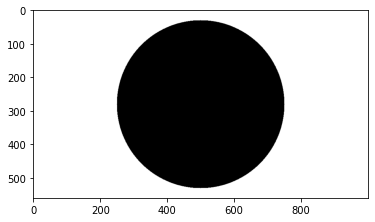

In [15]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.circle(mask, center, 250, 255, -1)
masked = cv2.bitwise_not(mask, mask)
plt.imshow(masked, cmap='gray')
plt.show()

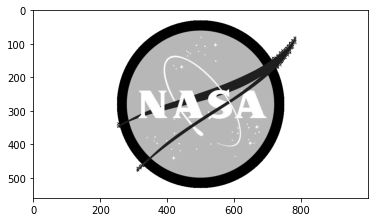

In [16]:
masked_img =img[:,:,2] + masked
plt.imshow(masked_img, cmap='gray')
plt.show()

### Histogramas
Um histograma mostra a distribuição dos níveis de cinza em uma imagem, ou seja, a quantidade de vezes que cada nível apareceu na imagem. Vamos ver um exemplo.

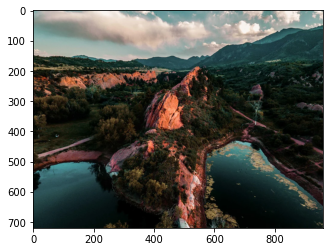

In [59]:
# Imagem original
hike = cv2.cvtColor(cv2.imread(os.path.join('files', 'hike.jpg')), cv2.COLOR_BGR2RGB)
plt.imshow(hike)
plt.show()

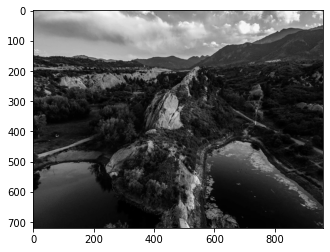

In [56]:
# Imagem em tons de cinza
gray = cv2.cvtColor(hike, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [52]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])
cv2.normalize(hist, hist, alpha=0, beta=1000, norm_type=cv2.NORM_MINMAX)


array([[3.71334473e+02],
       [3.38168427e+02],
       [6.39250427e+02],
       [8.41775146e+02],
       [5.20385742e+02],
       [6.09455872e+02],
       [9.68245239e+02],
       [9.52328674e+02],
       [9.41116516e+02],
       [8.30092529e+02],
       [8.26093750e+02],
       [4.89807129e+02],
       [8.37854797e+02],
       [9.61267029e+02],
       [1.00000000e+03],
       [9.19633057e+02],
       [8.09863586e+02],
       [6.09691101e+02],
       [5.28304810e+02],
       [7.70581787e+02],
       [8.19899658e+02],
       [8.39736572e+02],
       [7.85635864e+02],
       [6.99388428e+02],
       [6.09455872e+02],
       [4.38215454e+02],
       [5.96675537e+02],
       [6.96879395e+02],
       [6.92567017e+02],
       [6.63007690e+02],
       [5.99341370e+02],
       [4.90042328e+02],
       [4.22690918e+02],
       [3.94934906e+02],
       [5.48768982e+02],
       [5.46024780e+02],
       [5.36929565e+02],
       [4.55700165e+02],
       [3.72902618e+02],
       [2.90340271e+02],


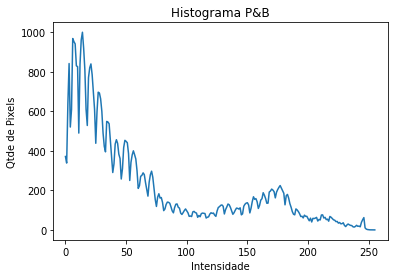

In [54]:
plt.figure()
plt.title("Histograma P&B")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(hist)
plt.xlim([-10, 266])
plt.show()
